In [1]:
import scipy.optimize
import numpy as np
import pandas as pd

import os
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.pylabtools import figsize
figsize(12, 10)
sbn.set_context("paper", font_scale=1)
sbn.set_style("whitegrid")

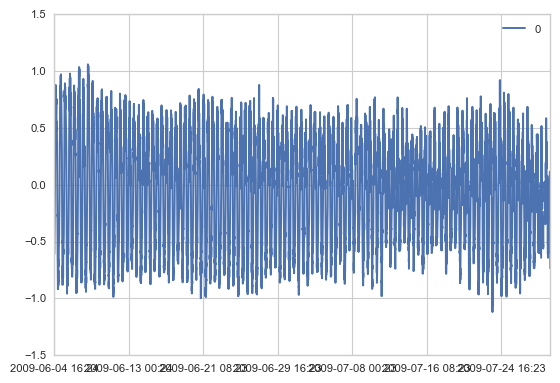

In [2]:
station_data = os.path.join('currentData', 'COD0901.pkl')

currents = pd.read_pickle(station_data)
currents.dropna()

currents['COD0901.1.s'] = pd.to_numeric(currents['COD0901.1.s'])
currents['COD0901.1.d'] = pd.to_numeric(currents['COD0901.1.d'])
speedAndDirection = pd.DataFrame(currents['COD0901.1.s'].values/100.*np.cos(currents['COD0901.1.d'].values*np.pi/180.), 
                                 index=currents.index)
                                 
plt.figure()
speedAndDirection.plot()
plt.show()

In [16]:
def harmonicConstituentModel(time, *hm):
    assert len(hm) % 3 == 0
    velocity = 0 
    for i in range(len(hm)//3):
        velocity += hm[3*i]*np.sin(hm[3*i+1] * time + hm[3*i+2])
    return velocity

starting_guess = tuple(1 for i in range(111))

velocities = speedAndDirection.as_matrix()

time = np.arange(0, len(velocities))*6/60
data = np.column_stack((time, velocities[:,0]))
data = data[~np.isnan(data).any(axis=1)]


# optimized_parameters, covariance = scipy.optimize.curve_fit(harmonicConstituentModel, 
#                                                                  xdata = data[:,0], 
#                                                                  ydata = data[:,1], 
#                                                                  p0 = starting_guess)

# print(optimized_parameters)


In [38]:
(np.sqrt(np.dot(data[:,1],data[:,1])) / len(velocities))


0.0041018097249463344

In [11]:
import pytides

In [15]:
from pytides.tide import Tide

In [26]:
from datetime import datetime
test, lsq = Tide.decompose(heights = data[:,1], t = data[:,0], t0 = datetime.now(), full_output = True)

In [36]:
constituents = test.model['constituent']
for i in range(len(constituents)):
    test.model['constituent'][i]

array([<pytides.constituent.BaseConstituent object at 0x10f4a2e80>,
       <pytides.constituent.CompoundConstituent object at 0x114da2710>], dtype=object)

AttributeError: 'Tide' object has no attribute 'constituents'